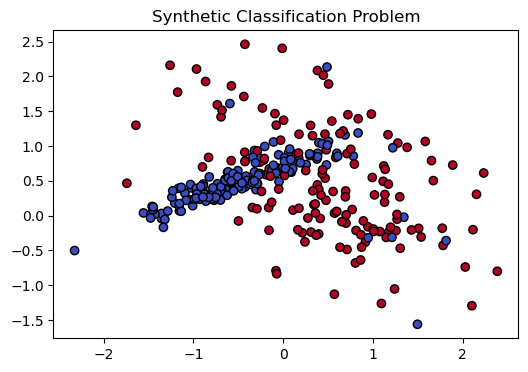

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Non-linear problem
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, 
    n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42
)

# Visualize it
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Classification Problem")
plt.show()


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        # Convert labels from {0, 1} to {-1, 1}
        y = np.where(y == 0, -1, 1)
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(X, y, sample_weight=weights)
            pred = stump.predict(X)

            # Compute error and model weight (alpha)
            err = np.sum(weights * (pred != y)) / np.sum(weights)
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))

            # Update weights: increase for misclassified
            weights *= np.exp(-alpha * y * pred)
            weights /= np.sum(weights)

            self.models.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            pred = model.predict(X)
            final_pred += alpha * pred
        return np.where(final_pred >= 0, 1, 0)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Naive Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Naive Decision Tree Accuracy: 0.8222222222222222


In [5]:
clf = AdaBoostClassifier(n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred))

Boosting Accuracy: 0.8666666666666667
